# General Social Survey
### Essential variables exploration

This notebook look at the [General Social Survey](https://gss.norc.org/) (GSS), exploring essential variables in the over the 50+ years of survey data. The primary data file for this exploration (gss7221_r
j2.dta) can be found in the [GSS Strata archive](https://gss.norc.org/documents/stata/GSS_stata.zip). If you want to work with this data for your own analysis, it is also essential to review the survey [codebooks](https://gss.norc.org/Get-Documentation).

Special thanks to [Allen Downey](https://github.com/AllenDowney) for all the work they have published on crafting jupyter notebooks with GSS data.

This notebook is part of the [GeneralSocialSurvey](https://github.com/CulleyHarrelson/GeneralSocialSurvey) github repository.

[Seaborn](https://seaborn.pydata.org/index.html) is the plotting library used to generate these visualizations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#import convenience function, column selection and data clensing functions
import gss_functions


In [2]:
# load the data
# extract this file from: https://gss.norc.org/documents/stata/GSS_stata.zip
gss = pd.read_stata('gss7221_r2.dta', columns=gss_functions.columns(), convert_categoricals=False)
gss_functions.gss_replace_invalid(gss)


In [3]:
    # some columns have no missing values
    clean_columns = ["id", "year", "ballot", "sex", "race", "reg16", "region", "srcbelt"]

    for column in gss.columns:
        if gss[column].dtype == int and column not in clean_columns:
            print(f"'{column}', ", end="")
    print()

# Variable: wrkstat

This variable tracks responses to the following question:

> Last week were you working full time, part time, going to schoool, keeping house, or what?



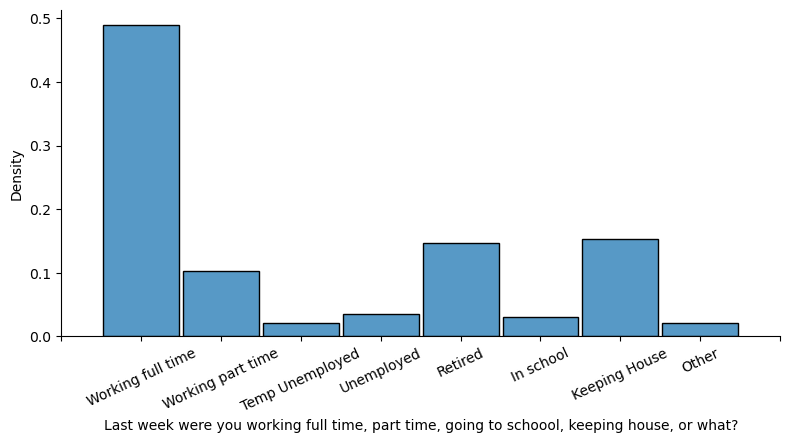

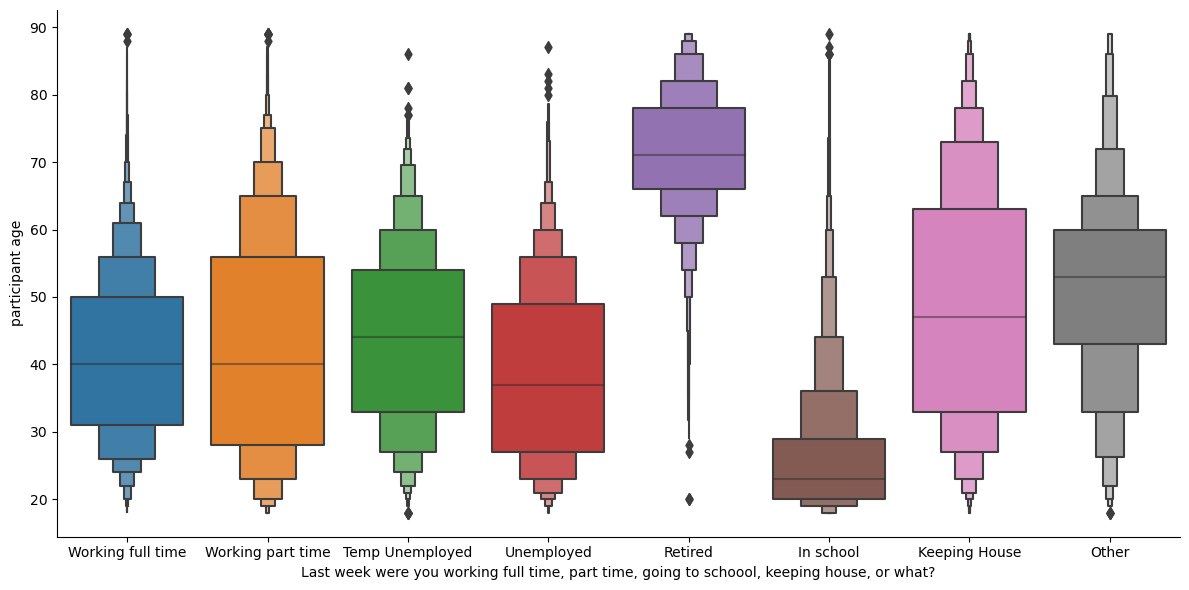

In [4]:

t = "Last week were you working full time, part time, going to schoool, keeping house, or what?"

spaced_labels = ['',
          'Working full time',
          'Working part time',
          'Temp Unemployed',
          'Unemployed',
          'Retired',
          'In school', 
          'Keeping House', 
          'Other', 
          '']

labels = filter(lambda label: label != '', spaced_labels)


p = sns.displot(
    data=gss, 
    kind="hist",
    x="wrkstat",
    multiple="stack", 
    discrete=True, 
    height=4,
    aspect=2, 
    legend=False,
    shrink=.95,
    stat="density", 
    common_norm=False
)
p.set_xticklabels(spaced_labels)
p.set_xlabels(t)
plt.xticks(rotation=25)
plt.draw()
warnings.filterwarnings("ignore")


h = sns.catplot(
    data=gss, 
    x="wrkstat", 
    y="age", 
    palette='tab10',
    kind="boxen",
    height=6,
    aspect=2, 
)

h.set_xticklabels(labels)
h.set_xlabels(t)
h.set_ylabels('participant age')
plt.draw()


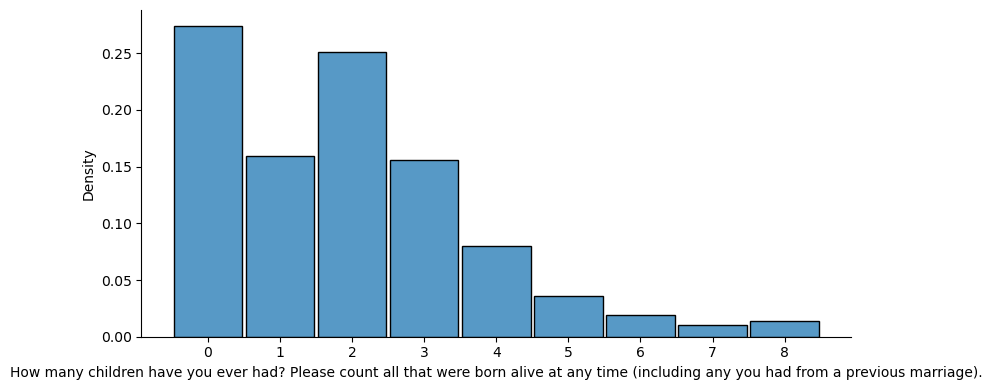

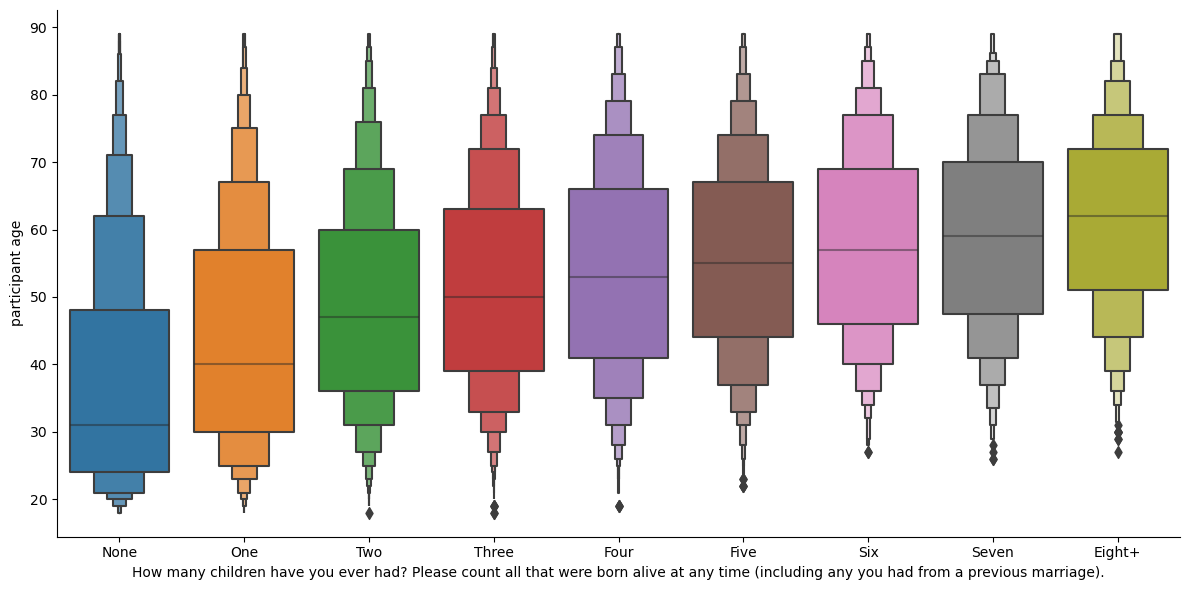

In [5]:

t = "How many children have you ever had? Please count all that were born alive at any time (including any you had from a previous marriage)."

spaced_labels = ['',
          'None',
          'One',
          'Two',
          'Three',
          'Four',
          'Five', 
          'Six', 
          'Seven',
          'Eight+'
          '']

labels = filter(lambda label: label != '', spaced_labels)


p = sns.displot(
    data=gss, 
    kind="hist",
    x="childs",
    multiple="stack", 
    discrete=True, 
    height=4,
    aspect=2, 
    legend=False,
    shrink=.95,
    stat="density", 
    common_norm=False
)
p.set_xlabels(t)
plt.xticks(range(9))
plt.draw()
warnings.filterwarnings("ignore")


h = sns.catplot(
    data=gss, 
    x="childs", 
    y="age", 
    palette='tab10',
    kind="boxen",
    height=6,
    aspect=2, 
)

h.set_xticklabels(labels)
h.set_xlabels(t)
h.set_ylabels('participant age')
plt.draw()


#gss_functions.values(gss['wrkstat'])


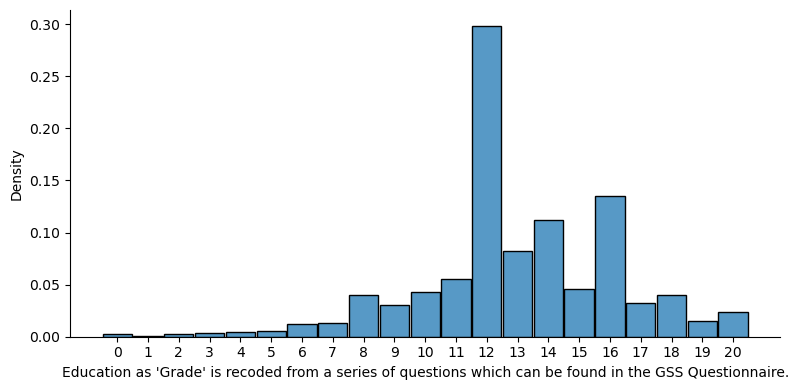

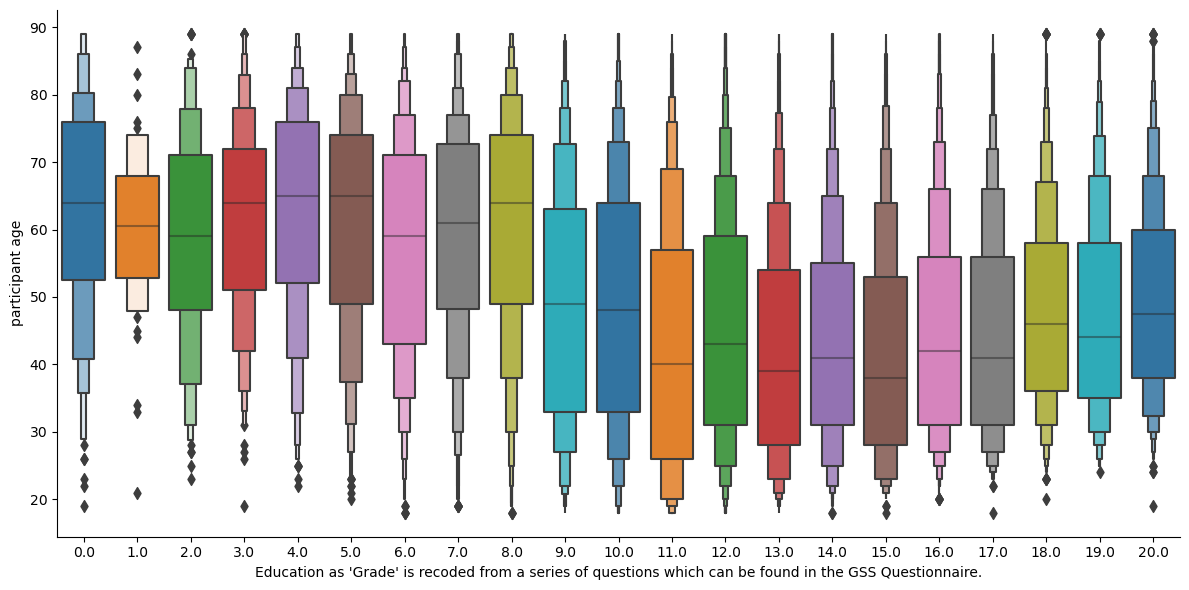

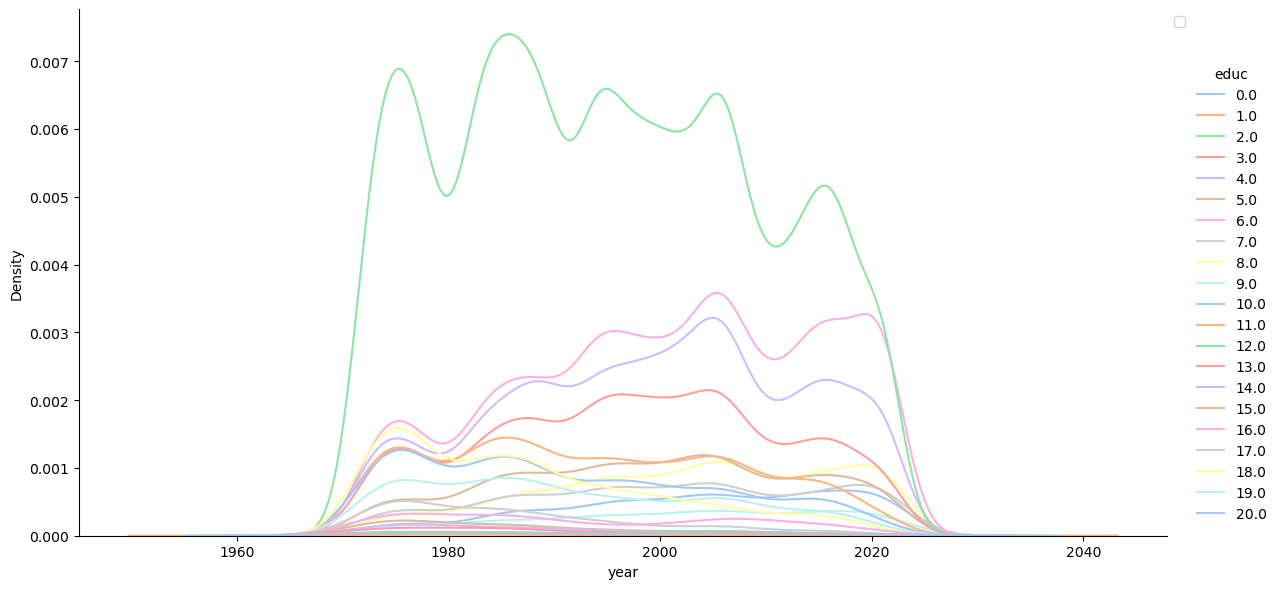

In [6]:

t = "Education as 'Grade' is recoded from a series of questions which can be found in the GSS Questionnaire."

p = sns.displot(
    data=gss, 
    kind="hist",
    x="educ",
    multiple="stack", 
    discrete=True, 
    height=4,
    aspect=2, 
    legend=False,
    shrink=.95,
    stat="density", 
    common_norm=False
)
p.set_xlabels(t)
plt.xticks(range(21))
plt.draw()
warnings.filterwarnings("ignore")


h = sns.catplot(
    data=gss, 
    x="educ", 
    y="age", 
    palette='tab10',
    kind="boxen",
    height=6,
    aspect=2, 
)

h.set_xlabels(t)
h.set_ylabels('participant age')
plt.draw()


by_year = sns.displot(
    gss, 
    x="year", 
    hue="educ", 
    palette='pastel',
    kind="kde",
    height=6,
    aspect=2
)

plt.legend(labels=labels, loc = 2, bbox_to_anchor = (1,1))
plt.draw()


# Variable: sex

**Notes:** Prior to 2021, SEX was interviewer coded. In 2021, SEX is a composite of SEXBIRTH1 and SEXNOW1 See GSS Methodological Report No. 9.

If planning to perform trend analysis with this variable, please consult GSS Methodological Report No. 56.


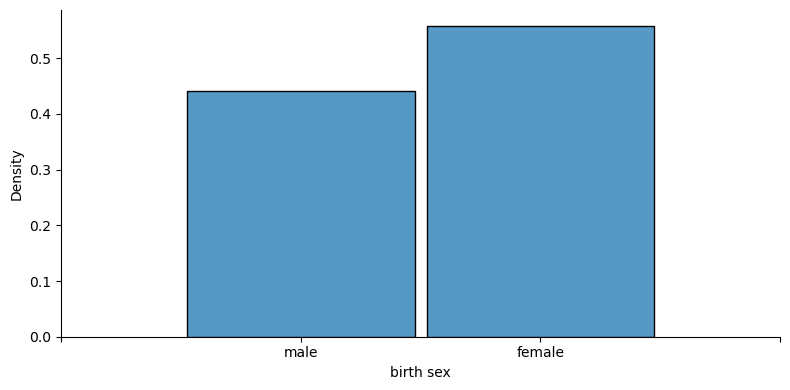

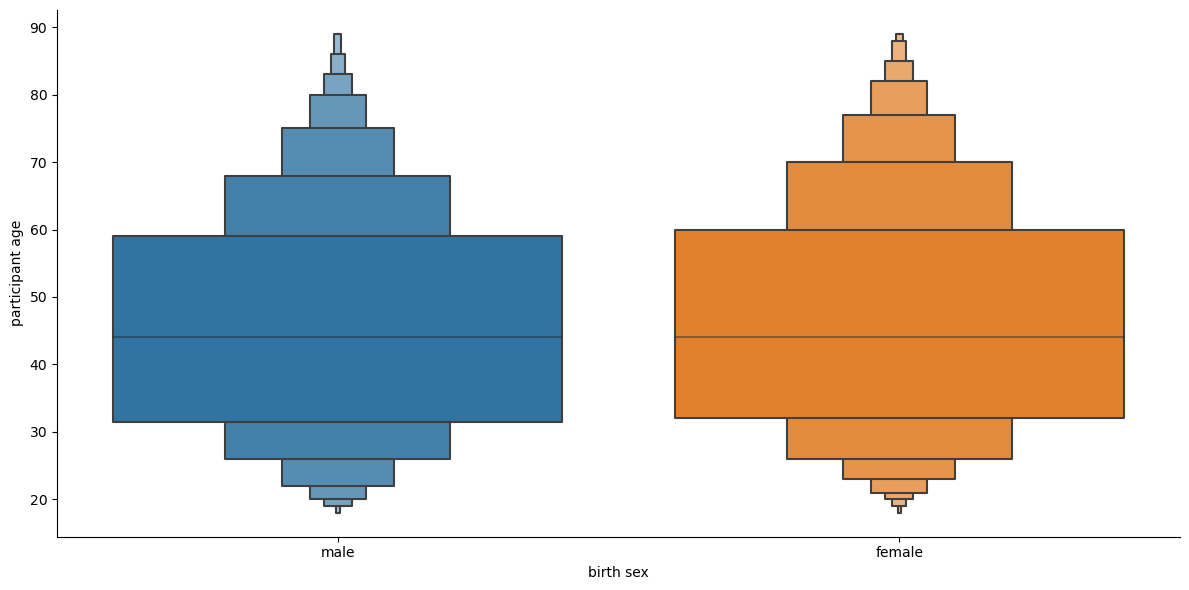

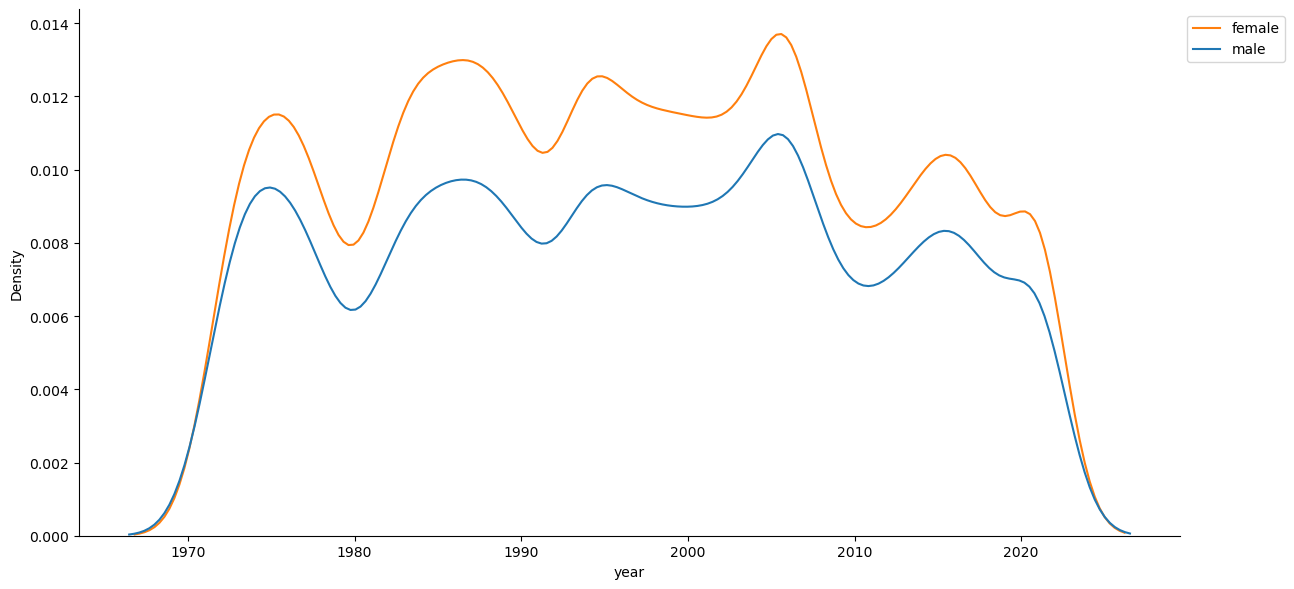

In [7]:

t = "birth sex"

p = sns.displot(
    data=gss, 
    kind="hist",
    x="sex",
    multiple="stack", 
    discrete=True, 
    height=4,
    aspect=2, 
    legend=False,
    shrink=.95,
    stat="density", 
    common_norm=False
)
plt.xticks(range(4))
p.set_xticklabels(['', 'male', 'female', ''])
p.set_xlabels(t)
plt.draw()
warnings.filterwarnings("ignore")


h = sns.catplot(
    data=gss, 
    x="sex", 
    y="age", 
    palette='tab10',
    kind="boxen",
    height=6,
    aspect=2, 
)

h.set_xlabels(t)
h.set_ylabels('participant age')
h.set_xticklabels(['male', 'female'])
plt.draw()


by_year = sns.displot(
    gss, 
    x="year", 
    hue="sex", 
    palette='tab10',
    kind="kde",
    height=6,
    aspect=2,
    legend=False,
)

plt.legend(labels=['female', 'male'], loc = 2, bbox_to_anchor = (1,1))
plt.draw()


# Variable: race

up until 2002, the interviewer assessed the race as "white, black, or other."  

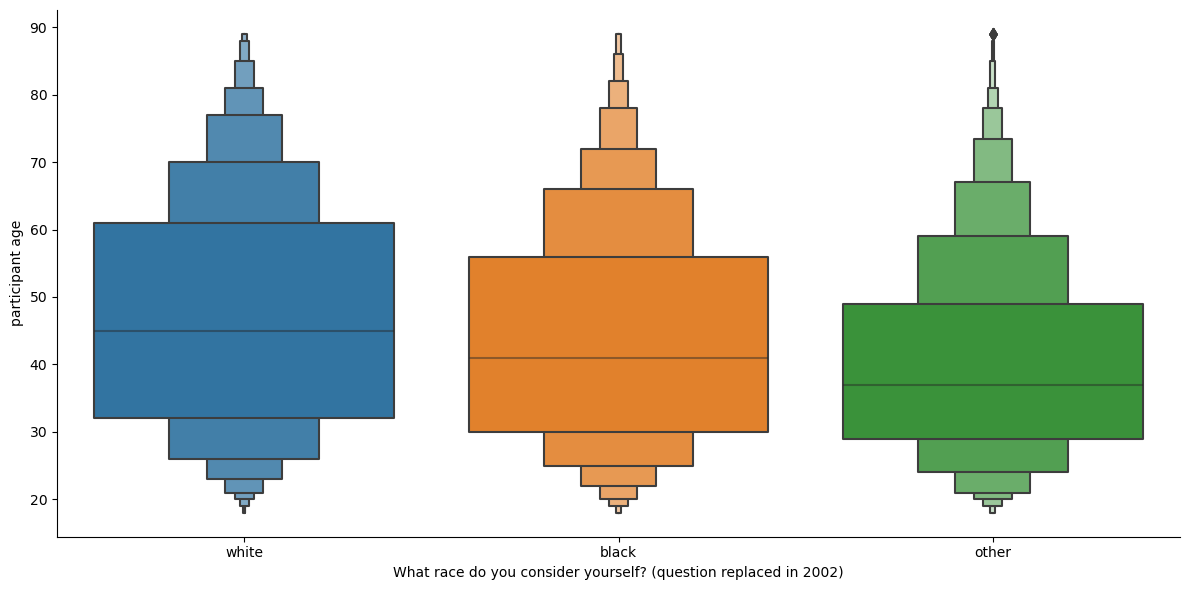

In [8]:

t = "What race do you consider yourself? (question replaced in 2002)"


h = sns.catplot(
    data=gss, 
    x="race", 
    y="age", 
    palette='tab10',
    kind="boxen",
    height=6,
    aspect=2, 
)

h.set_xlabels(t)
h.set_ylabels('participant age')
h.set_xticklabels(['white', 'black', 'other'])
plt.draw()




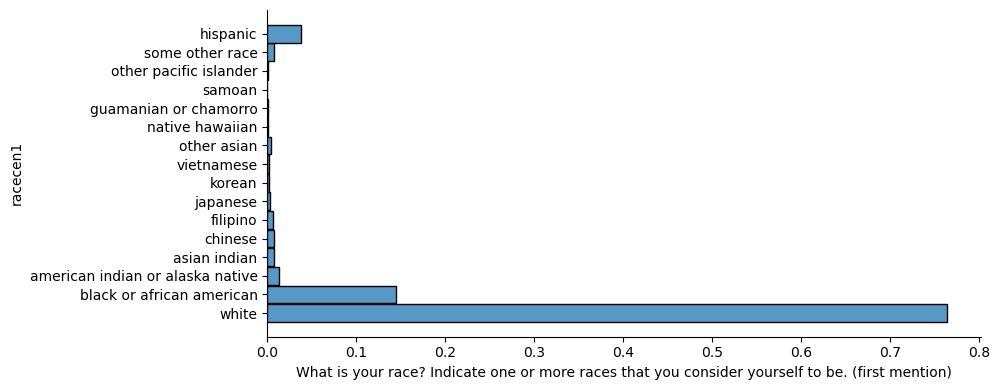

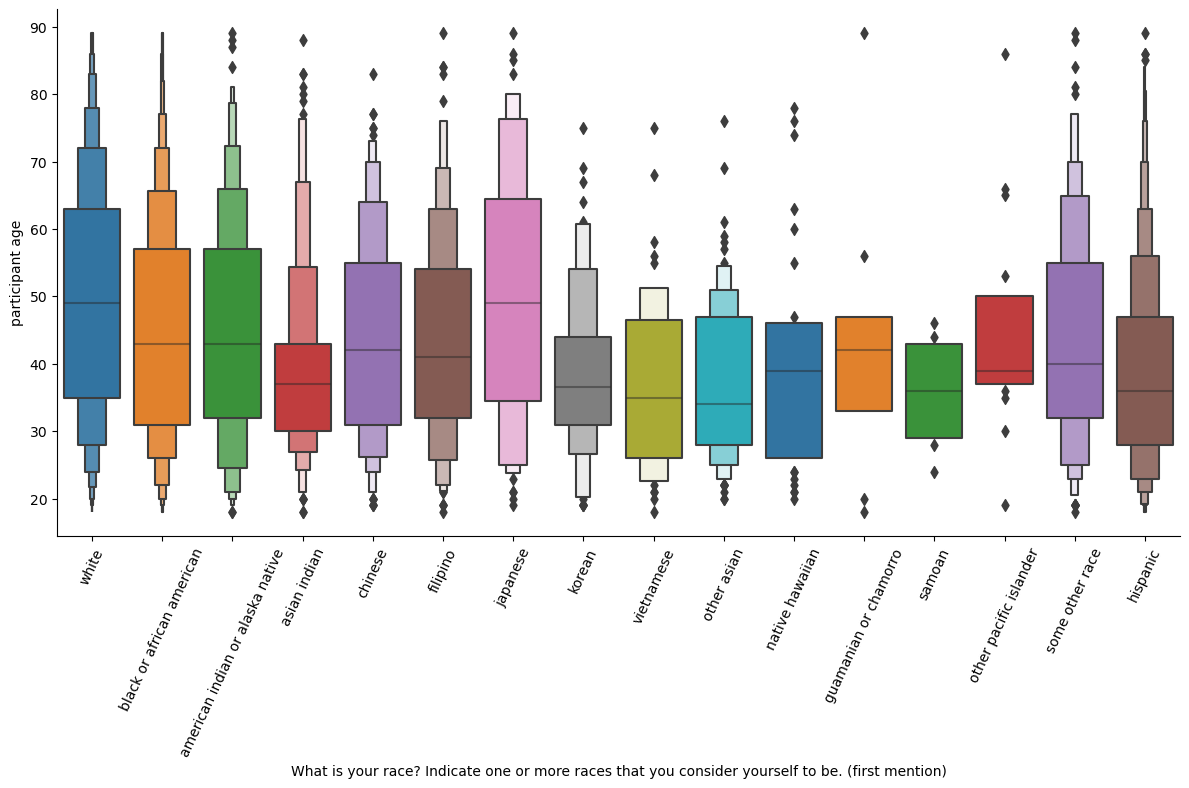

In [9]:

t = "What is your race? Indicate one or more races that you consider yourself to be. (first mention)"


labels = [
'white',
'black or african american',
'american indian or alaska native',
'asian indian',
'chinese',
'filipino',
'japanese',
'korean',
'vietnamese',
'other asian',
'native hawaiian',
'guamanian or chamorro',
'samoan',
'other pacific islander',
'some other race',
'hispanic']


p = sns.displot(
    data=gss, 
    kind="hist",
    y="racecen1",
    multiple="stack", 
    discrete=True, 
    height=4,
    aspect=2, 
    legend=False,
    shrink=.95,
    stat="density", 
    common_norm=False
)
plt.yticks(range(1,17))

#plt.xticks(range(18), rotation=40)
p.set_yticklabels(labels)
p.set_xlabels(t)
plt.draw()
warnings.filterwarnings("ignore")


h = sns.catplot(
    data=gss, 
    x="racecen1", 
    y="age", 
    palette='tab10',
    kind="boxen",
    height=6,
    aspect=2, 
)

h.set_xlabels(t)
h.set_xticklabels(labels)
h.set_ylabels('participant age')
plt.xticks(rotation=65)
#h.set_xticklabels(['male', 'female'])
plt.draw()





In [10]:
 #gss.to_csv('gss.csv')
